In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

/Users/m04m_br/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
In /Users/m04m_br/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/m04m_br/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/m04m_br/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/m04m_br/anaconda3/lib/python3.7/site-package

In [2]:
base = pd.read_csv('dados.csv')
base.head(5)

,Jan-23,Fev-23,Mar-23,Abr-23
0,0.00,0.00,100.00,0.00
1,64.19,56.08,64.19,64.19
2,65.92,9.93,545.83,0.00
3,16.00,16.00,16.00,16.00
4,0.00,0.00,0.00,0.00


In [3]:
### Get all the features columns except the class
features = list(base.columns)[:]

In [4]:
list(base.columns)[:]

['Jan-23', 'Fev-23', 'Mar-23', 'Abr-23']

In [5]:
### Get the features data
data = base[features]
data.head(5)

,Jan-23,Fev-23,Mar-23,Abr-23
0,0.00,0.00,100.00,0.00
1,64.19,56.08,64.19,64.19
2,65.92,9.93,545.83,0.00
3,16.00,16.00,16.00,16.00
4,0.00,0.00,0.00,0.00


In [18]:
clustering_kmeans = KMeans(n_clusters=4)
data['clusters'] = clustering_kmeans.fit_predict(data)

/Users/m04m_br/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


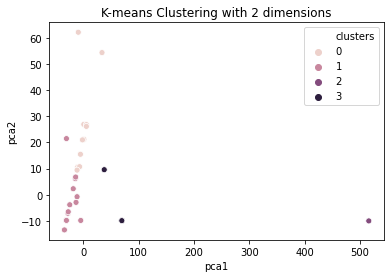

In [19]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [8]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
print(data)

    Jan-23  Fev-23  Mar-23  Abr-23  clusters
0     0.00    0.00  100.00    0.00         2
1    64.19   56.08   64.19   64.19         4
2    65.92    9.93  545.83    0.00         1
3    16.00   16.00   16.00   16.00         0
4     0.00    0.00    0.00    0.00         0
5     0.00    0.00    0.00    0.00         0
6     0.00    0.00    0.00    0.00         0
7     0.00    0.00    0.00    0.00         0
8    -3.63   -3.63   -3.63   -3.63         0
9    12.49   12.21   12.28   12.13         0
10   17.80   12.30   19.18    9.08         0
11    0.00    0.00    0.00    0.00         0
12   20.55   28.46   31.35   36.73         4
13    0.00    0.00    0.00    0.00         0
14   18.39   18.39   17.34    6.91         0
15   22.46   31.72   31.50   31.00         4
16   57.40   99.55    0.00    0.00         3
17    0.00    0.00    0.00    0.00         0
18   45.73   57.79    0.00    0.00         4
19    0.00    0.00    0.00   31.30         0
20    0.00   64.18   25.29   25.29         4
21    0.00

**Valores "Normalizados"**

In [10]:
previsores = data.iloc[:,:].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

previsores_csv = pd.DataFrame(previsores, columns=['ID','Jan-23', 'Feb-23','Mar-23','Apr-23'])
previsores_csv.to_csv('previsores.csv')

In [11]:
base_scaled = pd.read_csv('previsores.csv')

In [12]:
base_scaled.head(5)

,Unnamed: 0,ID,Jan-23,Feb-23,Mar-23,Apr-23
0,0,-0.630464,-0.639380,0.891295,-0.596161,0.246941
1,1,2.949932,0.957213,0.434365,3.285536,1.363543
2,2,3.046428,-0.356673,6.580019,-0.596161,-0.311360
3,3,0.261985,-0.183861,-0.180532,0.371391,-0.869662
4,4,-0.630464,-0.639380,-0.384690,-0.596161,-0.869662


In [13]:
list(base_scaled.columns)[2:9]

['Jan-23', 'Feb-23', 'Mar-23', 'Apr-23']

In [14]:
features_scaled = list(base.columns)[2:6]

In [15]:
data = base[features_scaled]

In [16]:
#, precompute_distances="auto", n_jobs=-1
clustering_kmeans = KMeans(n_clusters=5)
data['clusters'] = clustering_kmeans.fit_predict(data)

/Users/m04m_br/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


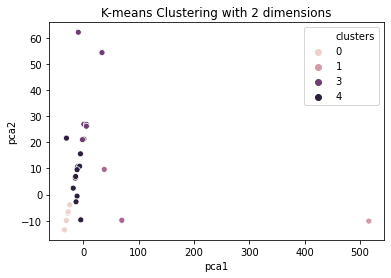

In [17]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()